## Modeling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, LassoCV, Lasso
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from IPython.display import display
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
%matplotlib inline
sns.set_style('darkgrid')
sns.set(font_scale=1)

In [2]:
#import the updated train & test features

train = pd.read_csv('Data/PostFeatureEng_train.csv')
test = pd.read_csv('Data/PostFeatureEng_test.csv')

In [3]:
#check
print(train.shape)
train.head()

(1454, 117)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,HouseAge,TotalBaths,MSZoning_enc,Reg_LotShape,MasVnrType_enc,ExterQual_enc,KitchenQual_enc,BsmtQual_enc,HeatingQC_enc,GarageFinish_enc,CentralAir_enc,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,7.444249,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,12.247694,5,3.5,2,1,1,2,2,3,4,2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,7.140453,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,12.109011,31,2.5,2,1,0,1,1,3,4,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,7.487734,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,12.317167,7,3.5,2,0,1,2,2,3,4,2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,7.448334,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,11.849398,91,2.0,2,0,0,1,2,2,3,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,7.695303,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,12.429216,8,3.5,2,0,1,2,2,3,4,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


To prepare our data for modeling, we will first seperate the relevant features and the target variable (`SalePrice`) from the dataset. We will then divide the data into train & holdout set using the **train_test_split** function. This allows us to evaluate the model performance on data it has never seen before. Doing this on the *test* dataset could result in [overfitting](https://en.wikipedia.org/wiki/Overfitting).

Step 1. Divide into features(X) & target variable(y)

In [4]:
y = train['SalePrice'].copy()
y[:5]

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64

In [5]:
#all features that we are going to use have been converted to numeric columns.
numeric_cols = train.select_dtypes(include='number').columns
numeric_cols

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice', 'HouseAge', 'TotalBaths',
       'MSZoning_enc', 'Reg_LotShape', 'MasVnrType_enc', 'ExterQual_enc',
       'KitchenQual_enc', 'BsmtQual_enc', 'HeatingQC_enc', 'GarageFinish_enc',
       'CentralAir_enc', 'Neighborhood_Blmngtn', 'Neighborhood_Blueste',
       'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr',
       'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards',
       'Neighbor

In [6]:
features = numeric_cols.drop(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
                  'BsmtFinSF1','BsmtFinSF2', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 
                   'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
                   'Fireplaces', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 
                   '3SsnPorch', 'ScreenPorch', 'PoolArea','MiscVal', 'MoSold', 'YrSold', 'SalePrice', 'MasVnrArea'])

In [7]:
features

Index(['OverallQual', 'TotalBsmtSF', 'GrLivArea', 'GarageCars', 'HouseAge',
       'TotalBaths', 'MSZoning_enc', 'Reg_LotShape', 'MasVnrType_enc',
       'ExterQual_enc', 'KitchenQual_enc', 'BsmtQual_enc', 'HeatingQC_enc',
       'GarageFinish_enc', 'CentralAir_enc', 'Neighborhood_Blmngtn',
       'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide',
       'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR',
       'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes',
       'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_SWISU',
       'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_Somerst',
       'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker'],
      dtype='object')

In [8]:
X = train[features]
X.head()

,OverallQual,TotalBsmtSF,GrLivArea,GarageCars,HouseAge,TotalBaths,MSZoning_enc,Reg_LotShape,MasVnrType_enc,ExterQual_enc,KitchenQual_enc,BsmtQual_enc,HeatingQC_enc,GarageFinish_enc,CentralAir_enc,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,7,856,7.444249,2,5,3.5,2,1,1,2,2,3,4,2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,6,1262,7.140453,2,31,2.5,2,1,0,1,1,3,4,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,7,920,7.487734,2,7,3.5,2,0,1,2,2,3,4,2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,7,756,7.448334,3,91,2.0,2,0,0,1,2,2,3,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,8,1145,7.695303,3,8,3.5,2,0,1,2,2,3,4,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


Step 2. Divide data into train & holdout sets using [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).

In [9]:
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.33, random_state=42)

In [10]:
#check
X_train.head()

,OverallQual,TotalBsmtSF,GrLivArea,GarageCars,HouseAge,TotalBaths,MSZoning_enc,Reg_LotShape,MasVnrType_enc,ExterQual_enc,KitchenQual_enc,BsmtQual_enc,HeatingQC_enc,GarageFinish_enc,CentralAir_enc,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
482,7,910,7.509883,1,94,2.5,1,1,0,2,3,2,4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1097,5,950,6.856462,1,36,1.0,2,0,0,1,1,2,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
843,7,740,7.481556,2,16,3.5,2,1,1,2,2,3,4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
614,6,936,6.960348,2,47,2.0,2,1,1,1,2,2,4,2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1318,4,420,6.562444,0,69,1.0,2,1,0,0,0,2,3,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### OLS Linear Regression

Step 3. Create a linear regression model using scikit's Ordinary least squares [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html?highlight=linear%20regression#sklearn.linear_model.LinearRegression).

In [11]:
lr = LinearRegression()
model = lr.fit(X_train, y_train)

The score of a model gives its [R^2](https://scikit-learn.org/stable/modules/model_evaluation.html#r2-score) (coeffecient of determination) value. A value of 1 means the features fully (100%) explain the variance in the target variable. 

In [12]:
print('R^2 of the linear model is {:0.5f}' .format(model.score(X_holdout, y_holdout)))

R^2 of the linear model is 0.87908


In [13]:
#lets calculate the predicted values for the holdout dataset and its RMSE

predicted = model.predict(X_holdout)
rmse = (mean_squared_error(y_holdout, predicted))**0.5
print('RMSE of holdout dataset is: {}' .format(rmse))

print('RMSE of train dataset is: {}' .format((mean_squared_error(y_train, model.predict(X_train)))**0.5))

RMSE of holdout dataset is: 0.13772847236334848
RMSE of train dataset is: 0.12858486020244264


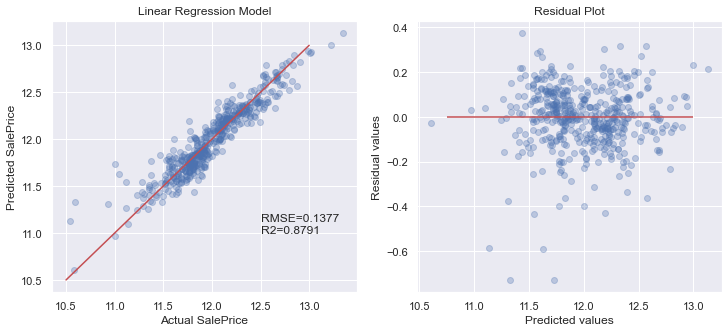

In [14]:
fig = plt.figure(figsize=(12,5))
ax = plt.subplot(1,2,1)
ax.scatter(y_holdout, predicted, alpha=0.3)
ax.plot([10.5,13], [10.5,13], color='r')
plt.ylabel('Predicted SalePrice')
plt.xlabel('Actual SalePrice')
plt.title('Linear Regression Model')
plt.annotate(text='RMSE={:0.4f}\nR2={:0.4f}'.format(rmse,model.score(X_holdout, y_holdout)), xy=(12.5,11))

ax = plt.subplot(1,2,2)
ax.scatter(predicted, (y_holdout - predicted), alpha=0.3)
ax.hlines(y=0, xmin=10.75, xmax=13, color = 'r')
plt.xlabel('Predicted values')
plt.ylabel('Residual values')
plt.title('Residual Plot')
plt.show()

In [15]:
#coefficients using linear regression
ols_coefs = pd.Series(model.coef_, index = X_train.columns).sort_values(ascending=False)
print(ols_coefs)

GrLivArea               0.339039
Neighborhood_Crawfor    0.137176
Neighborhood_Veenker    0.127124
Neighborhood_ClearCr    0.109356
CentralAir_enc          0.108269
Neighborhood_NridgHt    0.088780
Neighborhood_StoneBr    0.084342
Neighborhood_NoRidge    0.081949
MSZoning_enc            0.078682
OverallQual             0.063899
GarageCars              0.058204
TotalBaths              0.053540
KitchenQual_enc         0.049467
Neighborhood_BrkSide    0.036178
Neighborhood_Timber     0.029665
BsmtQual_enc            0.023604
GarageFinish_enc        0.023277
HeatingQC_enc           0.017693
Neighborhood_Sawyer     0.006648
ExterQual_enc           0.002535
MasVnrType_enc          0.000256
TotalBsmtSF             0.000137
HouseAge               -0.000224
Neighborhood_NAmes     -0.001099
Neighborhood_CollgCr   -0.004881
Neighborhood_SWISU     -0.009065
Neighborhood_Mitchel   -0.011202
Neighborhood_OldTown   -0.024393
Neighborhood_IDOTRR    -0.027142
Reg_LotShape           -0.027528
Neighborho

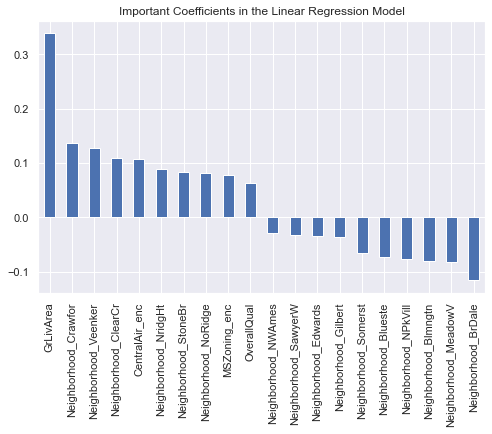

In [16]:
fig = plt.figure(figsize=(8,5))
pd.concat([ols_coefs.head(10), ols_coefs.tail(10)]).plot(kind='bar')
plt.title('Important Coefficients in the Linear Regression Model')
plt.show()

Using the linear regression model and features from the train column, we get a root mean square error of 0.138. The scatter plot graphically shows the relationship between the predicted and actual values. Residual plot shows that the majority of the residual values (y_test - predicted) are randomly scattered around 0.

### Ridge Regularization

Ridge Regularization is a useful technique that helps reduce overfitting. It decreases the influence of less important features by penalizing large regression coefficients. It takes a parameter, *alpha* that controls the strength of the regularization. This method **does not** perform variable selection. We will use the `RidgeCV` function to calculate the optimal *alpha* value.

In [17]:
ridge = RidgeCV(alphas = np.logspace(-5,2,100), scoring='neg_mean_squared_error')
ridge.fit(X_train, y_train)
alpha = ridge.alpha_
print("Best alpha :", alpha)

Best alpha : 2.364489412645407


Use this *alpha* to predict holdout SalePrice values and calculate the RMSE.

In [18]:
ridge_predicted = ridge.predict(X_holdout)
rmse = (mean_squared_error(y_holdout, ridge_predicted))**0.5
print('RMSE of holdout dataset is: {}' .format(rmse))
print('RMSE of train dataset is: {}' .format((mean_squared_error(y_train, ridge.predict(X_train)))**0.5))
print('r2: {}' .format(ridge.score(X_holdout, y_holdout)))

RMSE of holdout dataset is: 0.13775391574573848
RMSE of train dataset is: 0.12878095762556566
r2: 0.8790393225318716


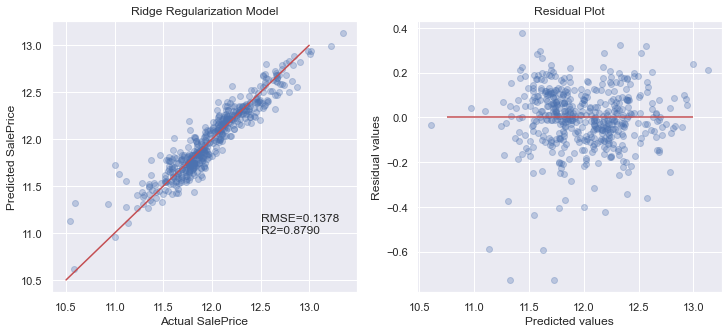

In [19]:
fig = plt.figure(figsize=(12,5))
ax = plt.subplot(1,2,1)
ax.scatter(y_holdout, ridge_predicted, alpha=0.3)
ax.plot([10.5,13], [10.5,13], color='r')
plt.ylabel('Predicted SalePrice')
plt.xlabel('Actual SalePrice')
plt.title('Ridge Regularization Model')
plt.annotate(text='RMSE={:0.4f}\nR2={:0.4f}'.format(rmse,ridge.score(X_holdout, y_holdout)), xy=(12.5,11))

ax = plt.subplot(1,2,2)
ax.scatter(predicted, (y_holdout - ridge_predicted), alpha=0.3)
ax.hlines(y=0, xmin=10.75, xmax=13, color = 'r')
plt.xlabel('Predicted values')
plt.ylabel('Residual values')
plt.title('Residual Plot')
plt.show()

In [20]:
#coefficients using Ridge Regularization. As we can see none of the coefficients are zero(i.e., no feature selection)
ridge_coefs = pd.Series(ridge.coef_, index = X_train.columns).sort_values(ascending=False)
print(ridge_coefs)

GrLivArea               0.322184
Neighborhood_Crawfor    0.124262
CentralAir_enc          0.101794
Neighborhood_ClearCr    0.096038
Neighborhood_Veenker    0.088247
MSZoning_enc            0.081827
Neighborhood_NridgHt    0.077785
Neighborhood_NoRidge    0.071570
Neighborhood_StoneBr    0.066967
OverallQual             0.066322
GarageCars              0.059910
TotalBaths              0.056807
KitchenQual_enc         0.049564
Neighborhood_BrkSide    0.031520
GarageFinish_enc        0.023550
BsmtQual_enc            0.022396
Neighborhood_Timber     0.022242
HeatingQC_enc           0.018871
Neighborhood_Sawyer     0.004557
ExterQual_enc           0.004473
TotalBsmtSF             0.000142
MasVnrType_enc          0.000127
HouseAge               -0.000100
Neighborhood_NAmes     -0.003284
Neighborhood_CollgCr   -0.008226
Neighborhood_SWISU     -0.009580
Neighborhood_Mitchel   -0.011841
Neighborhood_Blueste   -0.019436
Neighborhood_OldTown   -0.025123
Neighborhood_IDOTRR    -0.025547
Neighborho

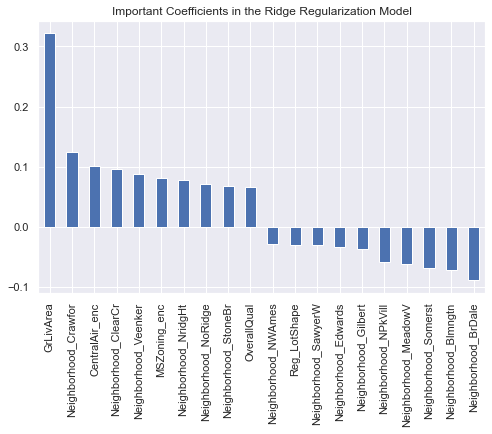

In [21]:
fig = plt.figure(figsize=(8,5))
pd.concat([ridge_coefs.head(10), ridge_coefs.tail(10)]).plot(kind='bar')
plt.title('Important Coefficients in the Ridge Regularization Model')
plt.show()

Ridge regression performed almost identical to the OLS Linear model. There was no substantial improvement in RMSE by the addition of *alpha*.

### Lasso Regression

LASSO is an alternative to Ridge Regression where the square of the coefficients is replaced by absolute value of coefficients. In contrast to ridge regression, lasso regression yields sparse feature vectors and therefore can be used to perform variable selection.

In [22]:
lassocv = LassoCV(alphas = np.logspace(-4,2,100), cv = 10, max_iter=50000)
lassocv.fit(X_train, y_train)
print('Best alpha: {}' .format(lassocv.alpha_))

Best alpha: 0.0001747528400007683


In [23]:
lasso_predicted = lassocv.predict(X_holdout)
rmse = (mean_squared_error(y_holdout, lasso_predicted))**0.5
print('RMSE of holdout dataset is: {}' .format(rmse))
print('RMSE of train dataset is: {}' .format((mean_squared_error(y_train, lassocv.predict(X_train)))**0.5))
print('r2: {}' .format(lassocv.score(X_holdout, y_holdout)))

RMSE of holdout dataset is: 0.13787777965543782
RMSE of train dataset is: 0.12874485529075844
r2: 0.8788216967995638


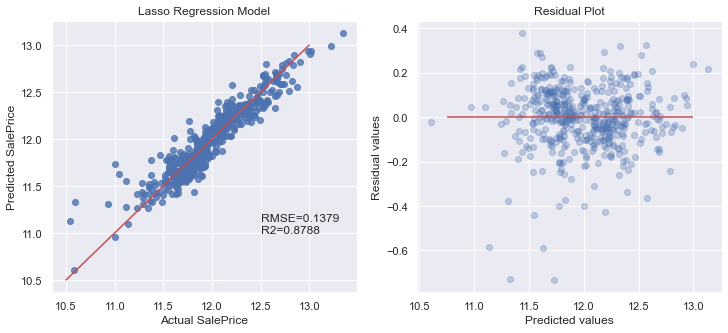

In [24]:
fig = plt.figure(figsize=(12,5))
ax = plt.subplot(1,2,1)
ax.scatter(y_holdout, lasso_predicted, alpha=0.8)
ax.plot([10.5,13], [10.5,13], color='r')
plt.ylabel('Predicted SalePrice')
plt.xlabel('Actual SalePrice')
plt.title('Lasso Regression Model')
plt.annotate(text='RMSE={:0.4f}\nR2={:0.4f}'.format(rmse,lassocv.score(X_holdout, y_holdout)), xy=(12.5,11))

ax = plt.subplot(1,2,2)
ax.scatter(predicted, (y_holdout - lasso_predicted), alpha=0.3)
ax.hlines(y=0, xmin=10.75, xmax=13, color = 'r')
plt.xlabel('Predicted values')
plt.ylabel('Residual values')
plt.title('Residual Plot')
plt.show()

In [25]:
lasso_coefs = pd.Series(lassocv.coef_, index = X_train.columns).sort_values(ascending=False)
print(lasso_coefs)

GrLivArea               0.336385
Neighborhood_Crawfor    0.142257
Neighborhood_ClearCr    0.110209
Neighborhood_Veenker    0.108757
CentralAir_enc          0.104617
Neighborhood_NridgHt    0.091102
MSZoning_enc            0.084957
Neighborhood_NoRidge    0.081990
Neighborhood_StoneBr    0.080204
OverallQual             0.064974
GarageCars              0.058938
TotalBaths              0.053996
KitchenQual_enc         0.049544
Neighborhood_BrkSide    0.046137
Neighborhood_Timber     0.030626
GarageFinish_enc        0.023085
BsmtQual_enc            0.022153
HeatingQC_enc           0.018663
Neighborhood_Sawyer     0.014821
Neighborhood_NAmes      0.008795
ExterQual_enc           0.003228
Neighborhood_CollgCr    0.002495
TotalBsmtSF             0.000143
MasVnrType_enc          0.000023
Neighborhood_Blueste   -0.000000
Neighborhood_Mitchel   -0.000000
Neighborhood_SWISU      0.000000
HouseAge               -0.000211
Neighborhood_IDOTRR    -0.000900
Neighborhood_OldTown   -0.005719
Neighborho

Lasso eliminated 3 out of 40 coefficients (`Neighborhood_Mitchel, MasVnrType_enc, Neighborhood_SWISU`). However, our error score is almost the same as the ones using Linear and Ridge Regression.   

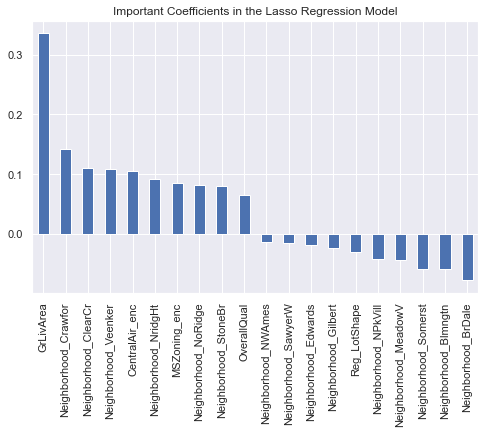

In [26]:
fig = plt.figure(figsize=(8,5))
pd.concat([lasso_coefs.head(10), lasso_coefs.tail(10)]).plot(kind='bar')
plt.title('Important Coefficients in the Lasso Regression Model')
plt.show()

In [27]:
X_test = test[features]

In [29]:
#check to make sure no null values in the features of interest
X_test.isnull().sum()

OverallQual             0
TotalBsmtSF             0
GrLivArea               0
GarageCars              0
HouseAge                0
TotalBaths              0
MSZoning_enc            0
Reg_LotShape            0
MasVnrType_enc          0
ExterQual_enc           0
KitchenQual_enc         0
BsmtQual_enc            0
HeatingQC_enc           0
GarageFinish_enc        0
CentralAir_enc          0
Neighborhood_Blmngtn    0
Neighborhood_Blueste    0
Neighborhood_BrDale     0
Neighborhood_BrkSide    0
Neighborhood_ClearCr    0
Neighborhood_CollgCr    0
Neighborhood_Crawfor    0
Neighborhood_Edwards    0
Neighborhood_Gilbert    0
Neighborhood_IDOTRR     0
Neighborhood_MeadowV    0
Neighborhood_Mitchel    0
Neighborhood_NAmes      0
Neighborhood_NPkVill    0
Neighborhood_NWAmes     0
Neighborhood_NoRidge    0
Neighborhood_NridgHt    0
Neighborhood_OldTown    0
Neighborhood_SWISU      0
Neighborhood_Sawyer     0
Neighborhood_SawyerW    0
Neighborhood_Somerst    0
Neighborhood_StoneBr    0
Neighborhood

In [41]:
test_predicted = model.predict(X_test)

In [42]:
test_predicted[:5]

array([11.51266343, 11.95352699, 12.0270469 , 12.12946463, 12.3244603 ])

In [43]:
#convert log test_predicted values to the correct form using np.exp

final_prediction = np.exp(test_predicted)
final_prediction[:5]

array([ 99973.79953408, 155364.14984064, 167216.87434639, 185250.57239388,
       225136.08127893])

In [44]:
#create a submission file with ID and SalePrice values

submission = pd.DataFrame()
submission['Id'] = test['Id']
submission['SalePrice'] = final_prediction
submission.head()

,Id,SalePrice
0,1461,99973.799534
1,1462,155364.149841
2,1463,167216.874346
3,1464,185250.572394
4,1465,225136.081279


In [45]:
#save the file
submission.to_csv('Data/submission_3.csv', index=False)

I submitted files using all three models on kaggle. Got the best result with submission_2 - Ridge Regularization.

### Next Step

Go back and improve feature Engineering.